In [1]:
%matplotlib inline
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
movie_path = os.path.join(os.curdir, 'movielens')
! ls -al $movie_path

total 855112
drwxr-xr-x 2 sgrosu sgrosu      4096 Jul  4 08:43 .
drwxr-xr-x 6 sgrosu sgrosu      4096 Jul  4 13:28 ..
-rw-r--r-- 1 sgrosu sgrosu 323544381 Oct 17  2016 genome-scores.csv
-rw-r--r-- 1 sgrosu sgrosu     18103 Oct 17  2016 genome-tags.csv
-rw-r--r-- 1 sgrosu sgrosu    570090 Oct 17  2016 links.csv
-rw-r--r-- 1 sgrosu sgrosu   1397542 Mar 31  2015 movies.csv
-rw-r--r-- 1 sgrosu sgrosu 533444411 Mar 31  2015 ratings.csv
-rw-r--r-- 1 sgrosu sgrosu     10627 Jul  4 08:50 readme
-rw-r--r-- 1 sgrosu sgrosu     10261 Oct 17  2016 README.txt
-rw-r--r-- 1 sgrosu sgrosu  16603996 Mar 31  2015 tags.csv


In [3]:
!head -5 $movie_path/'movies.csv'

movieId,title,genres
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance


In [4]:
movies = pd.read_csv(os.path.join(movie_path,'movies.csv'),sep=',')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
tags = pd.read_csv(os.path.join(movie_path,'tags.csv'), sep=',')
tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


In [6]:
ratings = pd.read_csv(os.path.join(movie_path,'ratings.csv'), sep=',')

In [7]:
ratings.rating.value_counts()

4.0    5561926
3.0    4291193
5.0    2898660
3.5    2200156
4.5    1534824
2.0    1430997
2.5     883398
1.0     680732
1.5     279252
0.5     239125
Name: rating, dtype: int64

In [8]:
ratings.shape

(20000263, 4)

In [9]:
# For our current analysis we will remove the timestamp column from ratings and tags
del tags['timestamp']
del ratings['timestamp']

## Descriptive Statistics

In [10]:
ratings['rating'].describe()

count    2.000026e+07
mean     3.525529e+00
std      1.051989e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [11]:
ratings['rating'].mean()

3.5255285642993797

In [12]:
ratings.mean()

userId     69045.872583
movieId     9041.567330
rating         3.525529
dtype: float64

In [13]:
# most common rating - mode
ratings.rating.mode()

0    4.0
dtype: float64

In [14]:
ratings.rating.median()

3.5

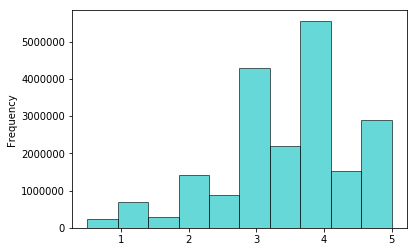

In [15]:
ratings.rating.plot(kind='hist', color = 'c', edgecolor='black', bins=10, alpha= .6)

In [16]:
ratings.rating.value_counts().shape

(10,)

In [17]:
# running correlation on ratings - unfortunately, there being only one column of measured data, the correlation will not be significant
ratings.corr()

,userId,movieId,rating
userId,1.000000,-0.000850,0.001175
movieId,-0.000850,1.000000,0.002606
rating,0.001175,0.002606,1.000000


In [18]:
# creating filters
filter_1 = ratings.rating > 5
filter_1.any()

False

In [19]:
filter_2 = ratings.rating > 0
filter_2.all()

True

In [20]:
ratings.mode()

,userId,movieId,rating
0,118205,296,4.0


In [21]:
movies[movies['movieId']==296]

,movieId,title,genres
293,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller


### Fill missing values

In [22]:
# df.fillna(method = 'ffill') # fill with previous value
# df.fillna(method = 'backfill') #  fill with next value

In [23]:
# dropna will drop any row (or column) containing missing values
#df.dropna(axis = 0 | 1)

In [24]:
# interpolation = guess the actual valuea by using a linear (or other types) 
# interpolation between two close values

## Data Cleaning: Handling Missing Data

In [25]:
movies.shape

(27278, 3)

In [26]:
movies.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

In [27]:
ratings.shape

(20000263, 3)

In [28]:
ratings.isnull().any()

userId     False
movieId    False
rating     False
dtype: bool

In [29]:
tags.shape

(465564, 3)

In [30]:
tags.isnull().any()

userId     False
movieId    False
tag         True
dtype: bool

In [31]:
tags = tags.dropna()

In [32]:
tags.isnull().any()

userId     False
movieId    False
tag        False
dtype: bool

## Data Visualization

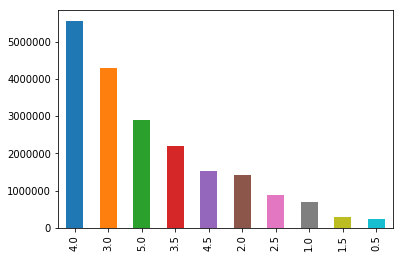

In [34]:
ratings.rating.value_counts().plot.bar()

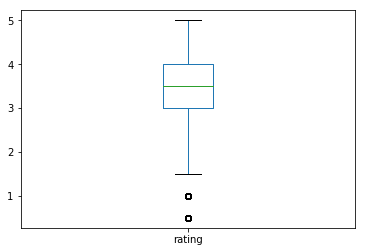

In [35]:
ratings.rating.plot.box()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc0ccbca940>]],
      dtype=object)

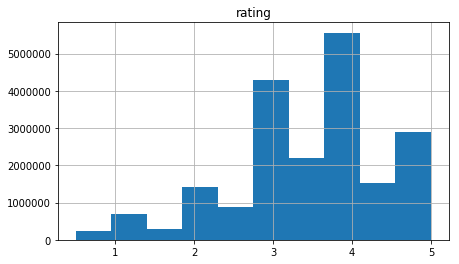

In [38]:
ratings.hist(column='rating', figsize=(7,4))

# Slicing techniques

In [39]:
movies[['title','genres']].head()

,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy


In [40]:
tag_counts = tags.tag.value_counts()

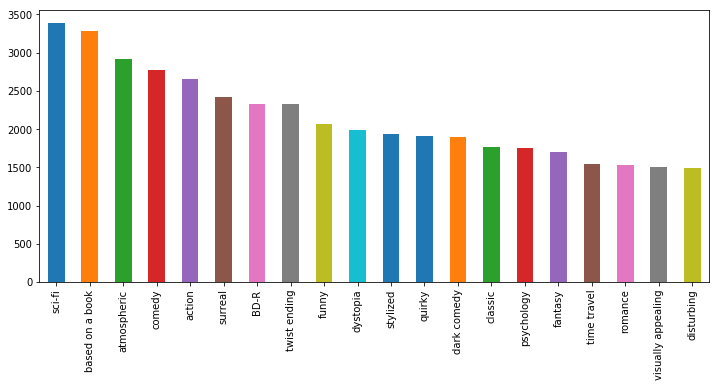

In [46]:
tag_counts[:20].plot(kind='bar',figsize=(12,5))

In [47]:
high_rating = ratings.rating >= 4.0

In [49]:
ratings[high_rating][-5:]

,userId,movieId,rating
20000256,138493,66762,4.5
20000257,138493,68319,4.5
20000258,138493,68954,4.5
20000259,138493,69526,4.5
20000261,138493,70286,5.0


In [50]:
is_animation = movies.genres.str.contains('Animation')
movies[is_animation].head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
12,13,Balto (1995),Adventure|Animation|Children
47,48,Pocahontas (1995),Animation|Children|Drama|Musical|Romance
236,239,"Goofy Movie, A (1995)",Animation|Children|Comedy|Romance
241,244,Gumby: The Movie (1995),Animation|Children


## Groupby and aggregate

In [51]:
ratings_count = ratings[['movieId', 'rating']].groupby('rating').count()
ratings_count

,movieId
rating,
0.5,239125
1.0,680732
1.5,279252
2.0,1430997
2.5,883398
3.0,4291193
3.5,2200156
4.0,5561926
4.5,1534824


In [68]:
ratings_by_movie = ratings.groupby('movieId').agg({'rating':'mean', 'movieId':'count'})#.sort_values('movieId',ascending=False)

In [73]:
ratings_by_movie.shape[0] - ratings_by_movie[ratings_by_movie.movieId < 10].shape[0]

15451

## Merge Dataframes

In [74]:
movies.shape

(27278, 3)

In [75]:
tags.shape

(465548, 3)

In [76]:
t = movies.merge(tags, on='movieId', how='inner')

In [85]:
t.head()

,movieId,title,genres,userId,tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1644,Watched
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,computer animation
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,Disney animated feature
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,Pixar animation
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,TÃ©a Leoni does not star in this movie


In [88]:
t.groupby('movieId').agg({'title':'unique','tag':'sum','genres':'unique'})

,title,tag,genres
movieId,,,
1,[Toy Story (1995)],Watchedcomputer animationDisney animated featu...,[Adventure|Animation|Children|Comedy|Fantasy]
2,[Jumanji (1995)],time traveladapted from:bookboard gamechildhoo...,[Adventure|Children|Fantasy]
3,[Grumpier Old Men (1995)],old people that is actually funnysequel feverg...,[Comedy|Romance]
4,[Waiting to Exhale (1995)],chick flickrevengecharacterschick flickcharact...,[Comedy|Drama|Romance]
5,[Father of the Bride Part II (1995)],Diane KeatonfamilysequelSteve Martinweddingseq...,[Comedy]
6,[Heat (1995)],realistic actionAl PacinoMichael MannRobert De...,[Action|Crime|Thriller]
7,[Sabrina (1995)],Greg KinnearromanceremadeAs:Sabrina(1995)remak...,[Comedy|Romance]
8,[Tom and Huck (1995)],adapted from:bookauthor:Mark TwainLibrary Syst...,[Adventure|Children]
9,[Sudden Death (1995)],actionjean-claude van dammePeter HyamsJean-Cla...,[Action]


## Aggregation, merging and filters

In [90]:
avg_ratings = ratings.groupby('movieId', as_index=False).mean()
del avg_ratings['userId']
avg_ratings.head()

,movieId,rating
0,1,3.921240
1,2,3.211977
2,3,3.151040
3,4,2.861393
4,5,3.064592


In [91]:
box_office = movies.merge(avg_ratings, on='movieId', how='inner')
box_office.tail()

,movieId,title,genres,rating
26739,131254,Kein Bund für's Leben (2007),Comedy,4.0
26740,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,4.0
26741,131258,The Pirates (2014),Adventure,2.5
26742,131260,Rentun Ruusu (2001),(no genres listed),3.0
26743,131262,Innocence (2014),Adventure|Fantasy|Horror,4.0


In [93]:
is_highly_rated = box_office.rating >= 4.0
box_office[is_highly_rated].tail()

,movieId,title,genres,rating
26737,131250,No More School (2000),Comedy,4.0
26738,131252,Forklift Driver Klaus: The First Day on the Jo...,Comedy|Horror,4.0
26739,131254,Kein Bund für's Leben (2007),Comedy,4.0
26740,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,4.0
26743,131262,Innocence (2014),Adventure|Fantasy|Horror,4.0


In [94]:
is_comedy = box_office.genres.str.contains('Comedy')
box_office[is_comedy].head()

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.921240
2,3,Grumpier Old Men (1995),Comedy|Romance,3.151040
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.861393
4,5,Father of the Bride Part II (1995),Comedy,3.064592
6,7,Sabrina (1995),Comedy|Romance,3.366484


In [95]:
box_office[is_highly_rated & is_comedy].head()

,movieId,title,genres,rating
81,82,Antonia's Line (Antonia) (1995),Comedy|Drama,4.004925
229,232,Eat Drink Man Woman (Yin shi nan nu) (1994),Comedy|Drama|Romance,4.035610
293,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.174231
352,356,Forrest Gump (1994),Comedy|Drama|Romance|War,4.029000
602,608,Fargo (1996),Comedy|Crime|Drama|Thriller,4.112359


### String operations

In [ ]:
box_office[is_highly_rated & is_comedy]['genres'].str.extract('(\|)')

In [ ]:
box_office[is_highly_rated & is_comedy]['genres'].str.replace('|',' - ')

## Vectorized string operations

In [99]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [101]:
# split genres into multiple columns
movie_genres = movies.genres.str.split('|', expand=True)
movie_genres[:10]

,0,1,2,3,4,5,6,7,8,9
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None
2,Comedy,Romance,None,None,None,None,None,None,None,None
3,Comedy,Drama,Romance,None,None,None,None,None,None,None
4,Comedy,None,None,None,None,None,None,None,None,None
5,Action,Crime,Thriller,None,None,None,None,None,None,None
6,Comedy,Romance,None,None,None,None,None,None,None,None
7,Adventure,Children,None,None,None,None,None,None,None,None
8,Action,None,None,None,None,None,None,None,None,None
9,Action,Adventure,Thriller,None,None,None,None,None,None,None


In [102]:
# adding column for comedy genre
movie_genres['isComedy'] = movies.genres.str.contains('Comedy')
movie_genres[:10]

,0,1,2,3,4,5,6,7,8,9,isComedy
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None,True
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None,False
2,Comedy,Romance,None,None,None,None,None,None,None,None,True
3,Comedy,Drama,Romance,None,None,None,None,None,None,None,True
4,Comedy,None,None,None,None,None,None,None,None,None,True
5,Action,Crime,Thriller,None,None,None,None,None,None,None,False
6,Comedy,Romance,None,None,None,None,None,None,None,None,True
7,Adventure,Children,None,None,None,None,None,None,None,None,False
8,Action,None,None,None,None,None,None,None,None,None,False
9,Action,Adventure,Thriller,None,None,None,None,None,None,None,False


In [104]:
# extract year from title
box_office['year'] = box_office.title.str.extract('\((\d+)\)')
box_office.head()

,movieId,title,genres,rating,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.921240,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.211977,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,3.151040,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.861393,1995
4,5,Father of the Bride Part II (1995),Comedy,3.064592,1995


## Parsing timestamps

In [106]:
tags = pd.read_csv(os.path.join(movie_path,'tags.csv'), sep=',')

In [108]:
tags['time'] = pd.to_datetime(tags.timestamp, unit='s')

In [109]:
tags.head()

,userId,movieId,tag,timestamp,time
0,18,4141,Mark Waters,1240597180,2009-04-24 18:19:40
1,65,208,dark hero,1368150078,2013-05-10 01:41:18
2,65,353,dark hero,1368150079,2013-05-10 01:41:19
3,65,521,noir thriller,1368149983,2013-05-10 01:39:43
4,65,592,dark hero,1368150078,2013-05-10 01:41:18


In [ ]:
recent = tags.time > '2015-01-01'
recent_tags = tags[recent]
recent_tags.sort_values(by='time', ascending=False)

In [116]:
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465564 entries, 0 to 465563
Data columns (total 5 columns):
userId       465564 non-null int64
movieId      465564 non-null int64
tag          465548 non-null object
timestamp    465564 non-null int64
time         465564 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 17.8+ MB


In [117]:
tags.time.dtype

dtype('<M8[ns]')

In [118]:
recent_tags.shape

(19924, 5)

In [119]:
tags.sort_values(by='time').head()

,userId,movieId,tag,timestamp,time
333932,100371,2788,monty python,1135429210,2005-12-24 13:00:10
333927,100371,1732,coen brothers,1135429236,2005-12-24 13:00:36
333924,100371,1206,stanley kubrick,1135429248,2005-12-24 13:00:48
333923,100371,1193,jack nicholson,1135429371,2005-12-24 13:02:51
333939,100371,5004,peter sellers,1135429399,2005-12-24 13:03:19


## Average movie ratings over time

In [124]:
avg_rating = ratings[['movieId','rating']].groupby('movieId', as_index=False).mean()
avg_rating.tail()

,movieId,rating
26739,131254,4.0
26740,131256,4.0
26741,131258,2.5
26742,131260,3.0
26743,131262,4.0


In [171]:
movies = pd.read_csv(os.path.join(movie_path,'movies.csv'),sep=',')

In [172]:
movies['year'] = movies.title.str.extract('\((\d+)\)')

In [186]:
movies[movies.year == '500']

,movieId,title,genres,year
13916,69757,(500) Days of Summer (2009),Comedy|Drama|Romance,500


In [187]:
movies.iloc[13916,-1] = '2009'

In [203]:
movies.year = pd.to_numeric(movies.year)

In [204]:
movies_rated = movies.merge(avg_rating, on='movieId', how='inner')
movies_rated.head()

,movieId,title,genres,year,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.921240
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.211977
2,3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.151040
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0,2.861393
4,5,Father of the Bride Part II (1995),Comedy,1995.0,3.064592


In [205]:
movies_rated.corr()

,movieId,year,rating
movieId,1.000000,0.174651,-0.090369
year,0.174651,1.000000,-0.051535
rating,-0.090369,-0.051535,1.000000


In [206]:
yearly_avg = movies_rated[['year','rating']].groupby('year', as_index=False).mean()

In [207]:
yearly_avg[-10:]

,year,rating
108,2006.0,3.163678
109,2007.0,3.130010
110,2008.0,3.157557
111,2009.0,3.148238
112,2010.0,3.131866
113,2011.0,3.162567
114,2012.0,3.104176
115,2013.0,3.145056
116,2014.0,3.122809
117,2015.0,2.813146


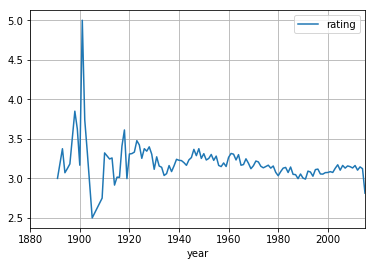

In [213]:
#fig = plt.figure(dpi=100, figsize=(14, 7))
yearly_avg.plot.line(x='year', y='rating', grid=True, xlim=[1880, 2015])